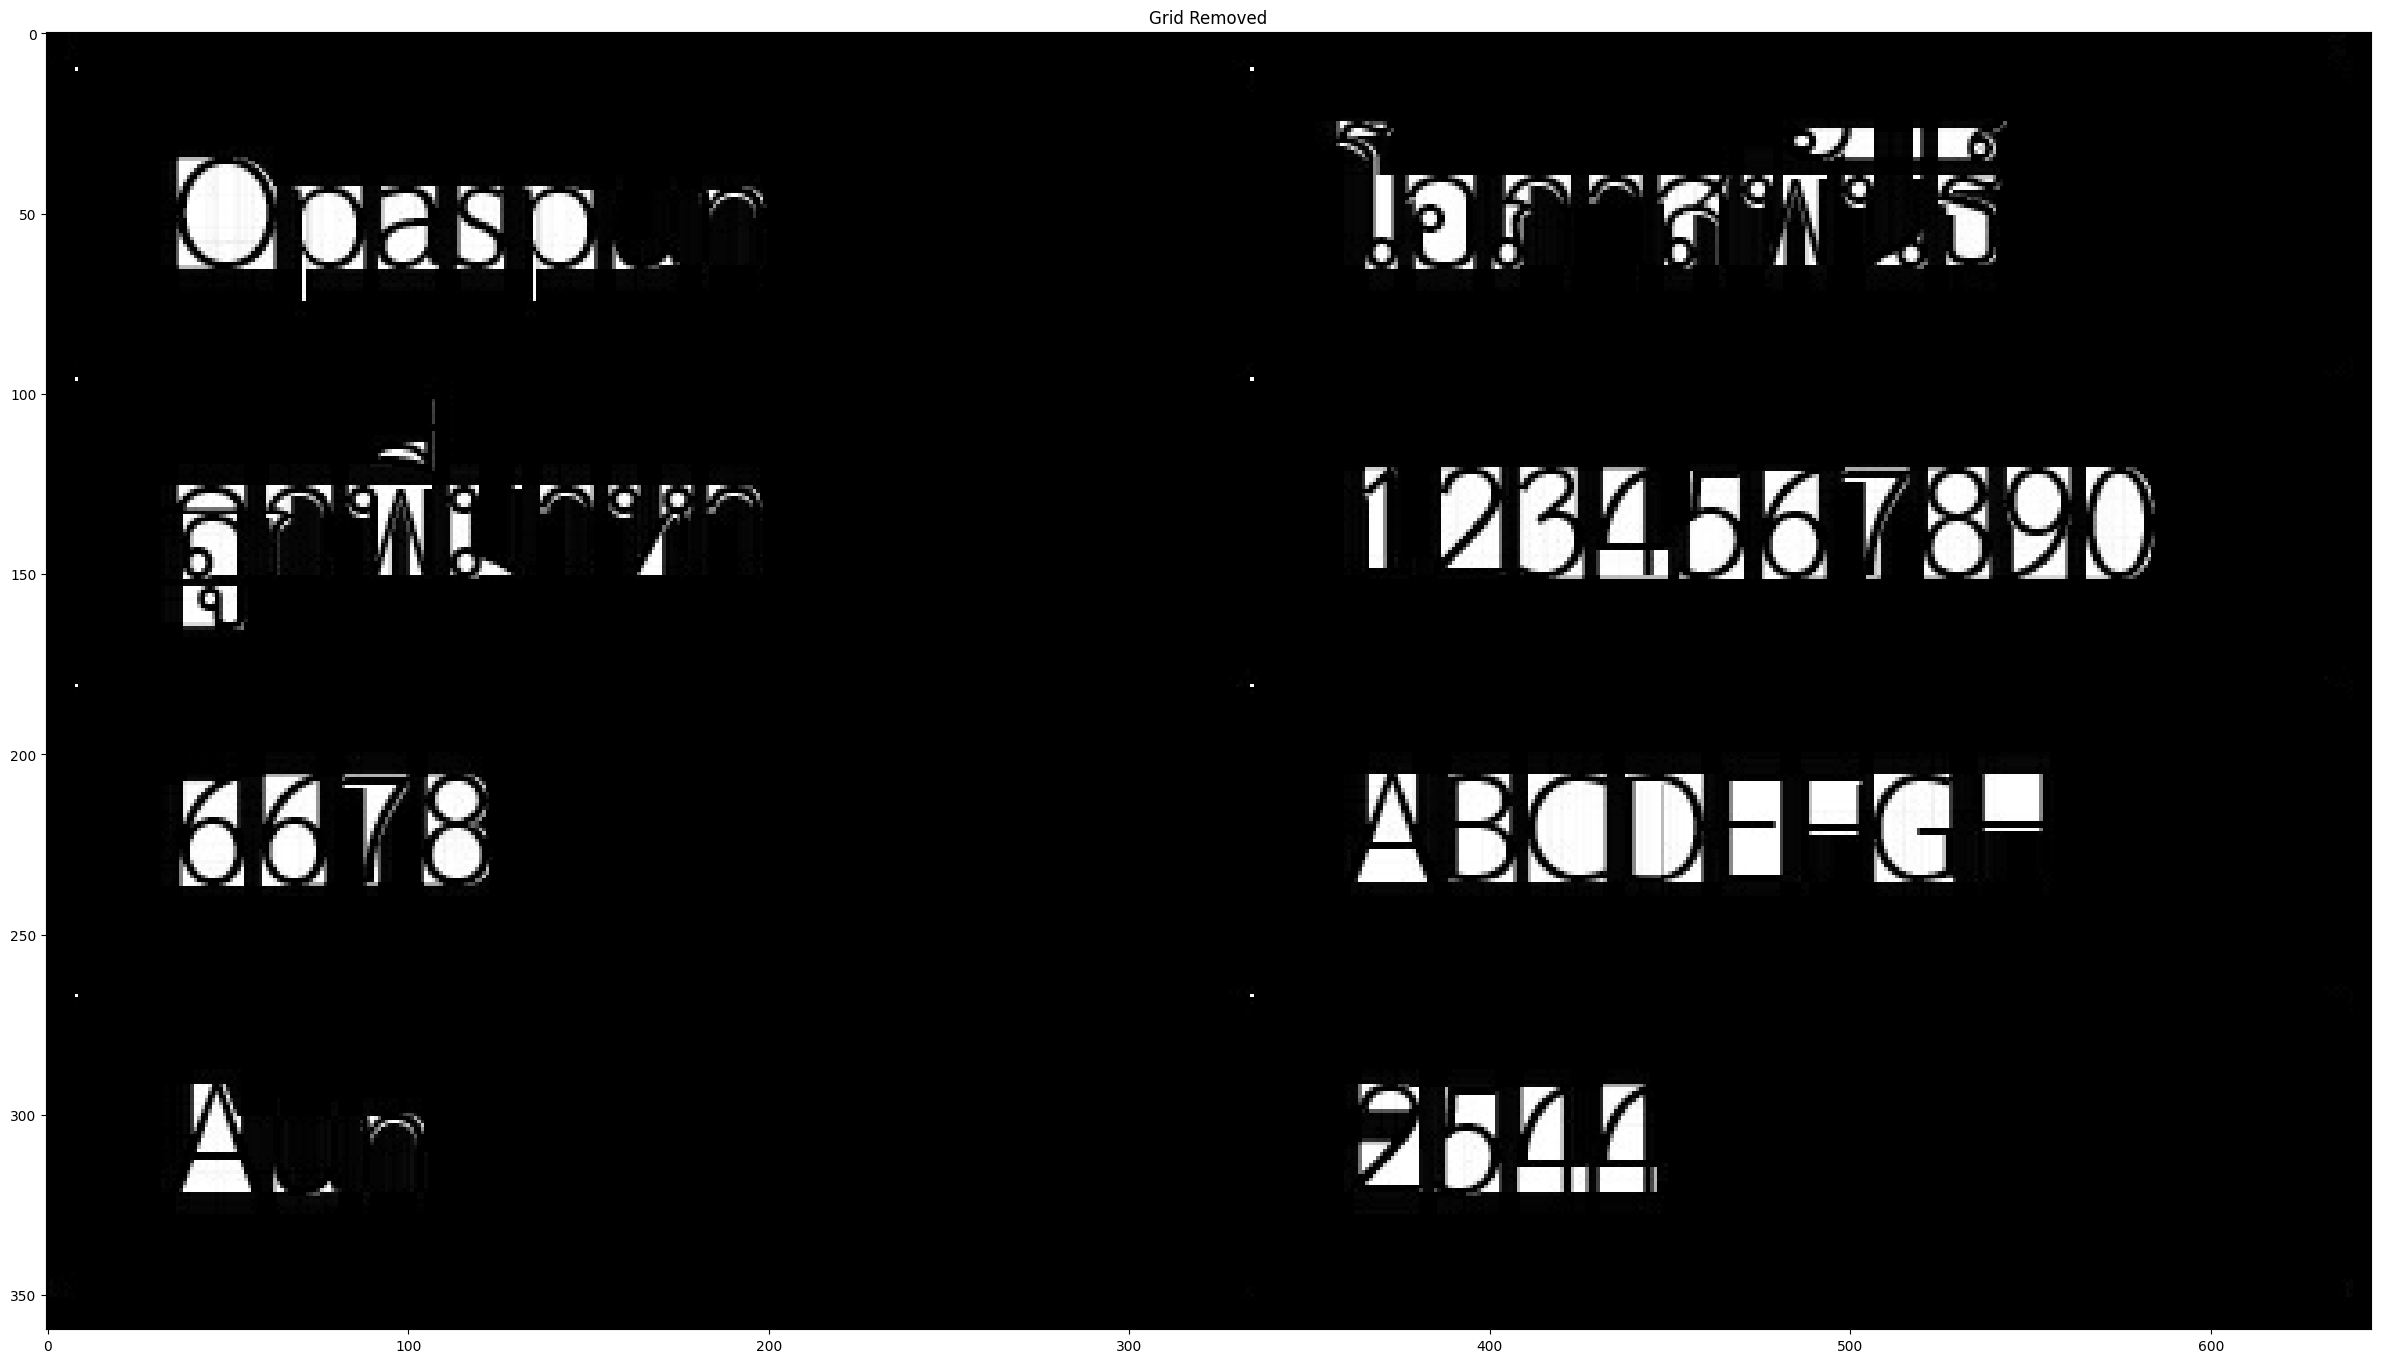

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

image = cv2.imread("../../data/test_images/table_text/text_table_01.jpg")
if image is None:
    raise FileNotFoundError("ไม่พบไฟล์ภาพ กรุณาตรวจสอบเส้นทางของไฟล์")

binary = image

# สร้าง Kernel ขนาดเล็กสำหรับลบเส้นแนวนอน
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
horizontal_removed = cv2.morphologyEx(binary, cv2.MORPH_OPEN, horizontal_kernel)

# สร้าง Kernel ขนาดเล็กสำหรับลบเส้นแนวตั้ง
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 40))
vertical_removed = cv2.morphologyEx(binary, cv2.MORPH_OPEN, vertical_kernel)

# รวมเส้นแนวตั้งและแนวนอน
grid_lines = cv2.add(horizontal_removed, vertical_removed)

# ลบเส้นตารางออกจากภาพ
result = cv2.subtract(binary, grid_lines)

# แสดงผล
plt.figure(figsize=(30, 20))
#plt.subplot(1, 3, 1), plt.imshow(binary, cmap="gray"), plt.title("Original Binary")
#plt.subplot(1, 3, 2), plt.imshow(grid_lines, cmap="gray"), plt.title("Detected Grid Lines")
plt.subplot(), plt.imshow(result, cmap="gray"), plt.title("Grid Removed")
plt.show()


In [9]:
import cv2
import numpy as np

# Load image
image = cv2.imread("../../data/test_images/transcript/img-1.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocessing
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 2)

# Detect lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 50))
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))

vertical_lines = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, vertical_kernel)
horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, horizontal_kernel)

# Combine lines
table_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)

# Find contours (cells)
contours, _ = cv2.findContours(table_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cell = image[y:y+h, x:x+w]
    # Save or process cell

# Show result
cv2.imshow("Detected Table", table_lines)
cv2.waitKey(0)
cv2.destroyAllWindows()


14
